In [1]:
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from urllib.request import Request, urlopen

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go 

In [3]:
init_notebook_mode(connected=True) 

In [4]:
req = Request('https://www.passportindex.org/byRank.php', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BeautifulSoup(webpage, 'html')

In [5]:
Country_name_html= [i for i in soup.find_all(class_='col-lg-3 col-md-3 col-sm-8 col-xs-7 name_country')]
VFS_html = [i for i in soup.find_all(class_='col-lg-1 col-md-1 col-sm-1 col-xs-1 name_rank')]
rank_vf_html=[i for i in soup.find_all(class_='rank vf')]
rank_voa_html=[i for i in soup.find_all(class_='rank voa')]
rank_vr_html=[i for i in soup.find_all(class_='rank vr')]

In [6]:
Country_name=list()
VFS=list()
rank_vf=list()
rank_voa=list()
rank_vr=list()

for i in range(len(Country_name_html)):
    Country_name.append(Country_name_html[i].text)
    
for i in range(len(VFS_html)):
    VFS.append(VFS_html[i].text)
    
for i in range(len(rank_vf_html)):
    rank_vf.append(rank_vf_html[i].text)
    
for i in range(len(rank_voa_html)):
    rank_voa.append(rank_voa_html[i].text)
        
for i in range(len(rank_vr_html)):
    rank_vr.append(rank_vr_html[i].text)

In [7]:
dict1={'COUNTRY':Country_name,'VFS':VFS,'rank_vf':rank_vf,'rank_voa':rank_voa,'rank_vr':rank_vr}
df=pd.DataFrame.from_dict(dict1)

In [8]:
df.head()

,COUNTRY,VFS,rank_vf,rank_voa,rank_vr
0,Singapore,165,127,38,33
1,Germany,165,126,39,33
2,Denmark,164,126,38,34
3,Sweden,164,126,38,34
4,Finland,164,126,38,34


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
COUNTRY     199 non-null object
VFS         199 non-null object
rank_vf     199 non-null object
rank_voa    199 non-null object
rank_vr     199 non-null object
dtypes: object(5)
memory usage: 7.9+ KB


In [10]:
import requests

url = 'https://www.worldatlas.com/aatlas/ctycodes.htm'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

country_code = pd.read_html(r.text)[0]

In [11]:
country_code.columns=country_code.iloc[0]

In [12]:
country_code.drop(['A2 (ISO)','NUM (UN)','DIALING CODE'], axis=1,inplace=True)

In [13]:
country_code.head()

,COUNTRY,A3 (UN)
0,COUNTRY,A3 (UN)
1,Afghanistan,AFG
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [14]:
df=pd.merge(country_code,df,how='right',on='COUNTRY')

In [15]:
df.head()

,COUNTRY,A3 (UN),VFS,rank_vf,rank_voa,rank_vr
0,Afghanistan,AFG,31,5,26,167
1,Albania,ALB,111,69,42,87
2,Algeria,DZA,59,18,41,139
3,Andorra,AND,147,100,47,51
4,Angola,AGO,56,24,32,142


In [16]:
data = dict(
        type = 'choropleth',
        locations = df['A3 (UN)'],
        z = df['VFS'],
        text = df['COUNTRY'],
        colorbar = {'title' : 'passport power'},
      ) 

In [17]:
df.head()

,COUNTRY,A3 (UN),VFS,rank_vf,rank_voa,rank_vr
0,Afghanistan,AFG,31,5,26,167
1,Albania,ALB,111,69,42,87
2,Algeria,DZA,59,18,41,139
3,Andorra,AND,147,100,47,51
4,Angola,AGO,56,24,32,142


In [18]:
layout = dict(
    title = 'passport power',
    geo = dict(
        showframe = False
        #        projection = {'type':'Mercator'}

    )
)

In [19]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

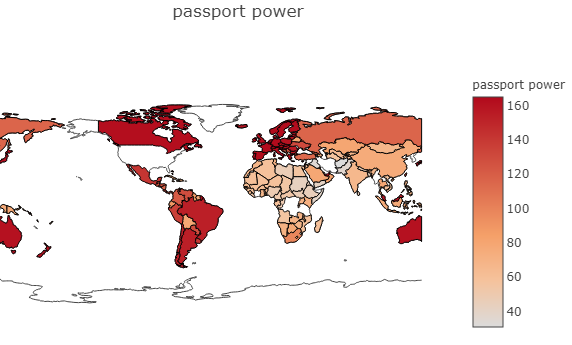

So, we observe that many countries has differents names in the 2 websites(for example: USA is unites states(worldatlas) and UNITED STATES OF AMERICA (in passportindex) )
So, Here I tried to unify the country names in the 2 differents dataframes

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 6 columns):
COUNTRY     199 non-null object
A3 (UN)     180 non-null object
VFS         199 non-null object
rank_vf     199 non-null object
rank_voa    199 non-null object
rank_vr     199 non-null object
dtypes: object(6)
memory usage: 10.9+ KB


In [21]:
df3=df[df['A3 (UN)'].isnull()]

In [22]:
df3.head()

,COUNTRY,A3 (UN),VFS,rank_vf,rank_voa,rank_vr
180,South Korea,NaN,164,122,42,34
181,United States of America,NaN,164,116,48,34
182,Brunei,NaN,143,104,39,55
183,Vatican City,NaN,141,98,43,57
184,St. Vincent and the Grenadines,NaN,135,100,35,63


In [23]:
nan_countries=['PRK','USA','CZE','BRN','VAT','VCT','MKD','MDA','FSM','TZA','CIV','LAO','MMR','COD','','PRK','PSE','IRN','SYR']

In [24]:
df3.loc[:,'A3 (UN)']=nan_countries

C:\Users\SFAR\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [25]:
df=df.dropna()

In [26]:
df4=pd.concat([df,df3],axis=0,keys=['COUNTRY','A3 (UN)','VFS','rank_vf','rank_voa','rank_vr'])

In [27]:
df4.head()

COUNTRY A3 (UN)  VFS rank_vf rank_voa rank_vr
COUNTRY 0  Afghanistan     AFG   31       5       26     167
        1      Albania     ALB  111      69       42      87
        2      Algeria     DZA   59      18       41     139
        3      Andorra     AND  147     100       47      51
        4       Angola     AGO   56      24       32     142

In [28]:
data = dict(
        type = 'choropleth',
        locations = df4['A3 (UN)'],
        z = df4['VFS'],
        text = df4['COUNTRY'],
        colorbar = {'title' : 'passport power'},
      ) 

In [29]:
layout = dict(
    title = 'passport power',
    geo = dict(
        showframe = False
        #projection = {'type':'Mercator'}
    )
)

In [30]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

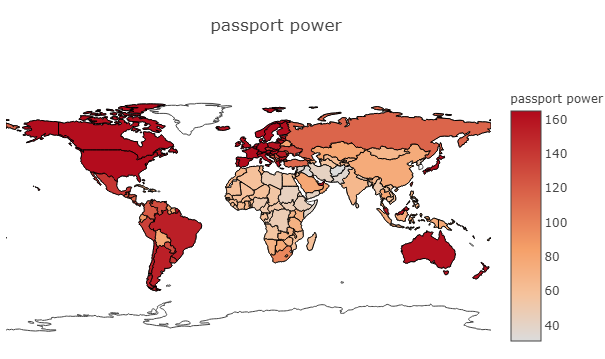